# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

from mpl_toolkits.mplot3d.axes3d import Axes3D

from sympy import symbols, diff

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example 1 - Cost/Loss Function and Gradient Descent
$$f(x) = x^{2} + x + 1 $$

In [2]:
def f(x):
    return x**2 + x + 1

### Data Genaration

In [3]:
x_1 = np.linspace(start=-3, stop=3, num=100)

### Using Cost function


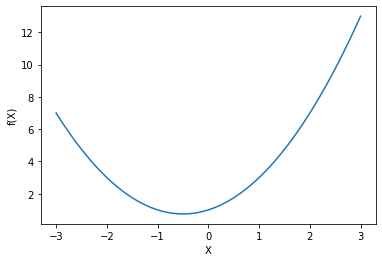

In [4]:
plt.xlabel('X')
plt.ylabel('f(X)')
plt.plot(x_1, f(x_1))


### Using gradient descent

In [5]:
def df(x):
    return x*2 + 1

In [6]:
new_x = 3
prev_x = 0
step_multi = 0.1
req_precision = 0.0001

for n in range(500):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x - step_multi * gradient
    if abs(new_x - prev_x) < req_precision:
        break
print('Local minimum is at: ', new_x)
print('Value of the cost function here is: ', f(new_x))


Local minimum is at:  -0.49962781616118024
Value of the cost function here is:  0.7500001385208099


# Example 2 - Multiple minima and initial guess
This example shows how the gradient descent is affected by having multiple minimums.
$$g(x) = x^{4} - 4*x^{2} + 5 $$

In [7]:
def g(x):
    return x**4 - 4*x**2 +5

def dg(x):
    return 4*x**3 - 8*x

### Data Genaration

In [8]:
x_2 = np.linspace(start=-2, stop=2, num=1000)

### Plotting

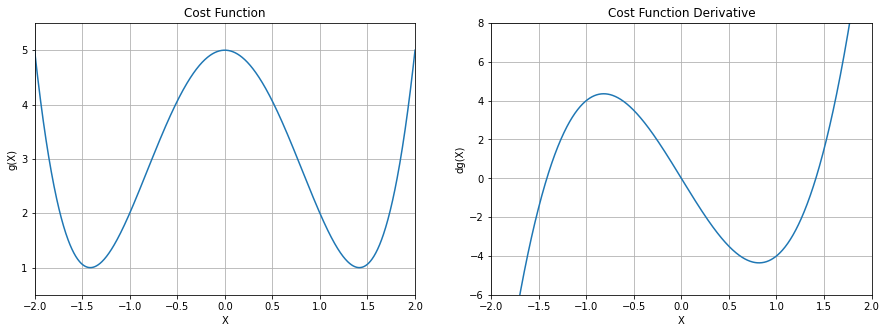

In [9]:
# Plot 1
plt.figure(figsize=[15, 5])
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title('Cost Function')
plt.xlabel('X')
plt.ylabel('g(X)')
plt.grid()
plt.plot(x_2, g(x_2))

# Plot 2
plt.subplot(1,2,2)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.title('Cost Function Derivative')
plt.xlabel('X')
plt.ylabel('dg(X)')
plt.grid()
plt.plot(x_2, dg(x_2))

plt.show()

### Using gradient descent
The initial guess, will highly affect the obtained value.

In [10]:
def gradient_descent(derivative_function, initial_guess, learning_rate=0.02, precision=0.001,
                     max_iteration = 300):
    n_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_function(new_x)]

    for i in range(max_iteration):
        p_x = n_x
        grad = derivative_function(p_x)
        n_x = p_x - learning_rate * grad

        x_list.append(n_x)
        slope_list.append(derivative_function(n_x))


        if abs(n_x - p_x) < precision:
            break
    return n_x, x_list, slope_list

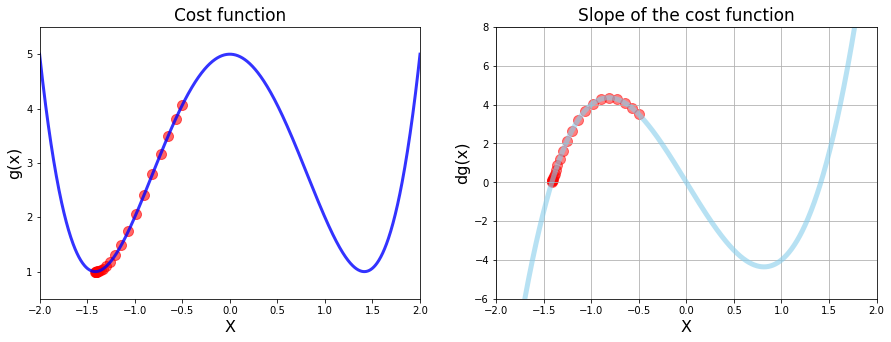

In [11]:
# Calling gradient descent function
n_x, x_list, slope_list = gradient_descent(derivative_function=dg, initial_guess= -0.5)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(x_list, g(np.array(x_list)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

plt.show()


# Example 3 - Divergence and Overflow
This example shows a number of issues that can occur using gradient descent.
$$h(x) = x^{5} - 2x^{4} + 2$$

In [12]:
def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

### Data Generation

In [13]:
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

### Gradient Descent
If the initial guess is -0.2, then an overflow occurs, as the function diverges.

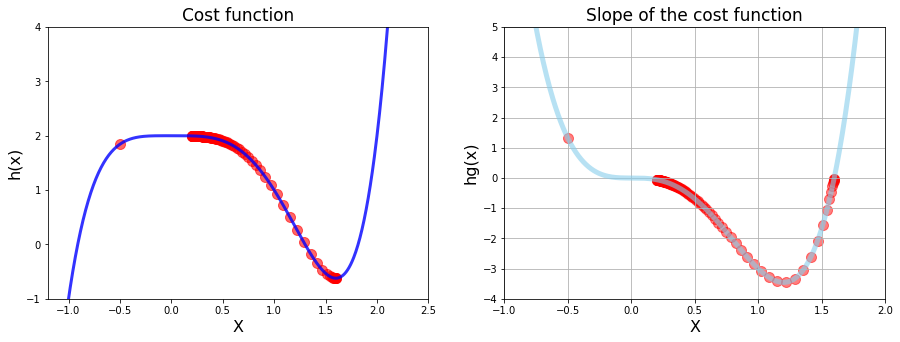

Local min occurs at:  1.5989534547394717
Cost at this minimum is:  -0.6214287992331258
Number of steps:  117


In [14]:
# Calling gradient descent function
n_x, x_list, slope_list = gradient_descent(derivative_function=dh, initial_guess= 0.2)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Graph: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(x_list, h(np.array(x_list)), color='red', s=100, alpha=0.6)

# 2 Graph: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('hg(x)', fontsize=16)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at: ', n_x)
print('Cost at this minimum is: ', h(n_x))
print('Number of steps: ', len(x_list))

# Example 4 - Significance of learning rate
If the learning-rate is too high, the step might "jump" over the minimum, and never converge.

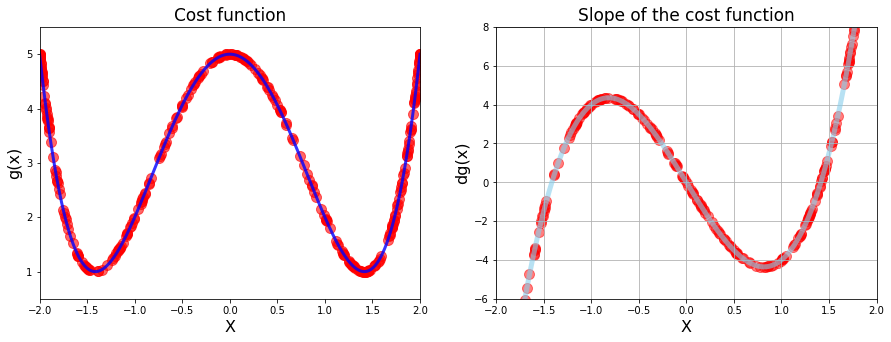

Number of steps:  301


In [15]:
# Calling gradient descent function
n_x, x_list, slope_list = gradient_descent(derivative_function=dg, initial_guess= 1.9,
                                           learning_rate=0.25, max_iteration=300)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(x_list, g(np.array(x_list)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

plt.show()
print('Number of steps: ', len(x_list))

# Example 5 - Minimize 3D cost function
$$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

In [16]:
def f(x, y):
    return 1 / ((3 ** (-x**2 - y**2)) + 1)

### Data Generation

In [17]:
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

x_4, y_4 = np.meshgrid(x_4, y_4)

### 3D Plot Generation

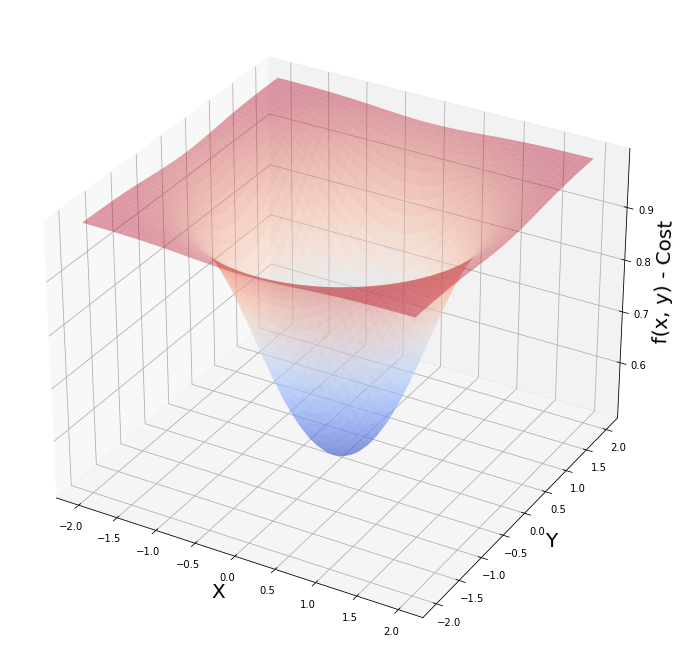

In [18]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()


### Gradiant Descent with  Partial differentiation

In [19]:
a, b = symbols('x, y')

multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)


for n in range(max_iter):
    # Note, this slows down the loop as it differentiates every loop
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)



print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


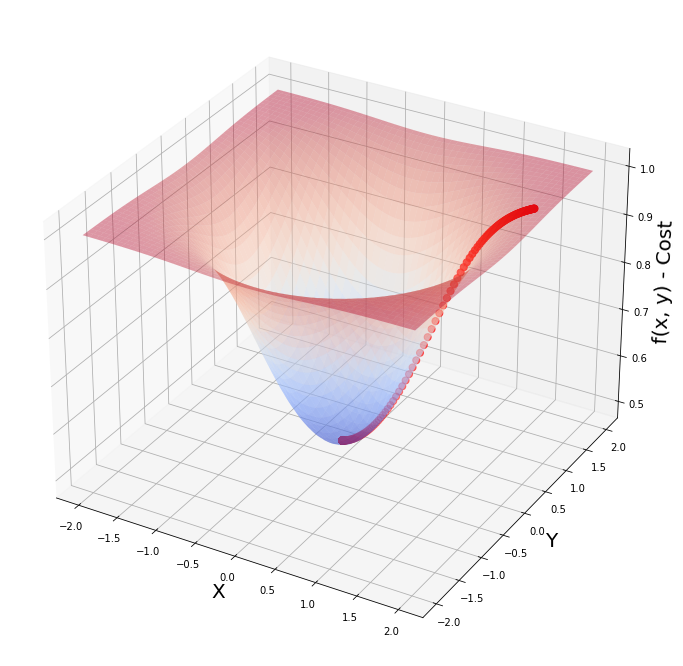

In [20]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

# Example 6 - MSE
$$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

### Data Generation

In [21]:
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]).transpose()

### Linear Regression and Plot

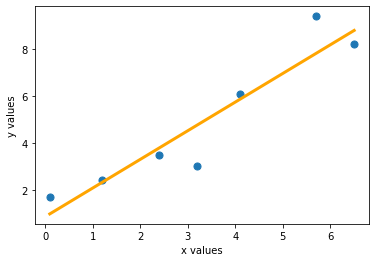

In [23]:
regr = LinearRegression()
regr.fit(x_5, y_5)

plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

### MSE Calculation

In [24]:
def mse(y, y_hat):
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

y_hat = regr.intercept_[0] + regr.coef_[0][0] * x_5

print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.9479655759794575
MSE regression is 0.9479655759794575
